In [13]:
import os

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
os.chdir('/content/drive/MyDrive/PDS Assignment-3')

In [18]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
# Load data into pandas DataFrame
df = pd.read_csv('raw_data/Corona_NLP_test.csv')
df.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
# Tokenize text data
df['tokens'] = df['OriginalTweet'].apply(word_tokenize)
print(df['tokens'][0])

['TRENDING', ':', 'New', 'Yorkers', 'encounter', 'empty', 'supermarket', 'shelves', '(', 'pictured', ',', 'Wegmans', 'in', 'Brooklyn', ')', ',', 'sold-out', 'online', 'grocers', '(', 'FoodKick', ',', 'MaxDelivery', ')', 'as', '#', 'coronavirus-fearing', 'shoppers', 'stock', 'up', 'https', ':', '//t.co/Gr76pcrLWh', 'https', ':', '//t.co/ivMKMsqdT1']


In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words and word.isalpha()])
print(df['tokens'][0])

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn', 'online', 'grocers', 'foodkick', 'maxdelivery', 'shoppers', 'stock', 'https', 'https']


In [25]:
# Count word frequencies
counts = Counter()
for token_list in df['tokens']:
    counts.update(token_list)
word_counts = pd.DataFrame(counts.items(), columns=['word', 'count'])
word_counts = word_counts.sort_values('count', ascending=False).reset_index(drop=True)
print(word_counts.head(20))

           word  count
0         https   1824
1   coronavirus   1515
2          food   1332
3         store   1012
4       grocery    816
5        people    783
6         stock    780
7           amp    610
8      shopping    522
9   supermarket    515
10       online    509
11        panic    483
12       prices    434
13         need    366
14       toilet    361
15        paper    355
16         like    334
17          get    327
18       buying    288
19           go    262


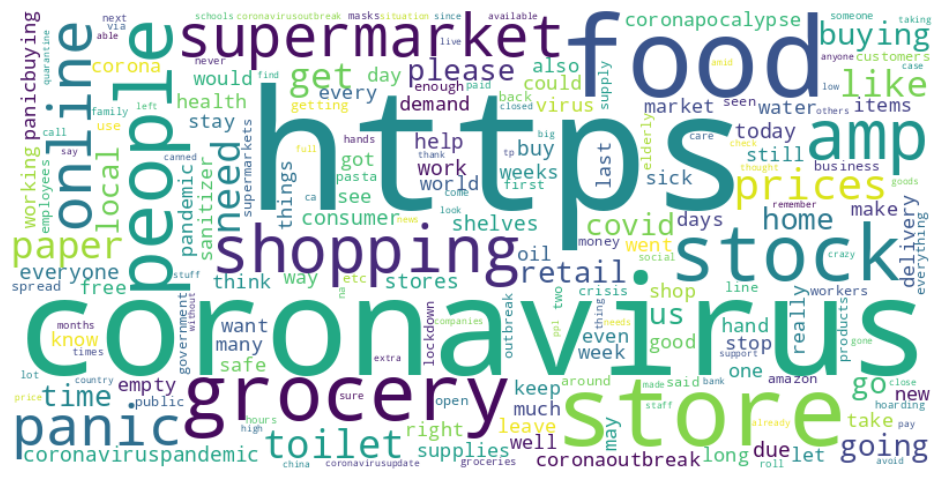

<Figure size 640x480 with 0 Axes>

In [26]:
word_freq = dict(zip(word_counts['word'], word_counts['count']))
wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(word_freq)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('results/visualization_1.png')